In [39]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [40]:
cifar = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


In [41]:
train_images.shape

(50000, 32, 32, 3)

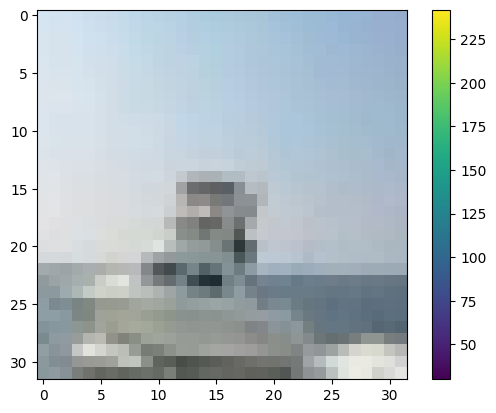

In [42]:
# Show image
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

In [44]:
from keras.utils import to_categorical
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [69]:
# Neural Network Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
])


In [70]:
# Loss Function Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4172 - accuracy: 0.4938
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4078 - accuracy: 0.4964
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3945 - accuracy: 0.4987
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3882 - accuracy: 0.5047
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3812 - accuracy: 0.5051
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3691 - accuracy: 0.5087
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3638 - accuracy: 0.5117
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3562 - accuracy: 0.5149
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3475 - accuracy: 0.5171
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

KeyError: 'val_loss'

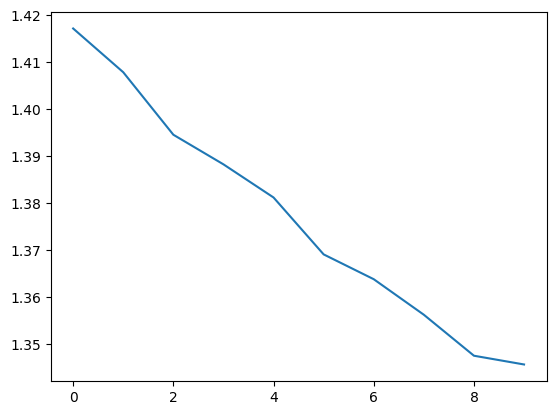

In [78]:
# Train the NN with specified number of epochs
# Too many epochs make model overfit
history = model.fit(train_images, train_labels, epochs=10)


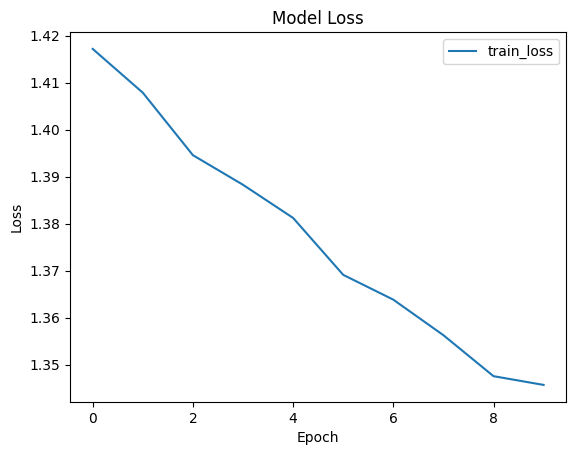

In [79]:
plt.plot(history.history['loss'], label='train_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [72]:
# Evaluating NN model using the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4554 - accuracy: 0.4832
Test accuracy: 0.4832000136375427


In [73]:
test_images.shape

(10000, 32, 32, 3)

In [74]:
# Make label predictions for the test dataset
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Model's Raw Prediction: [0.00217187 0.00378012 0.00629112 0.274991   0.02399411 0.2612435
 0.41183922 0.00706864 0.00442564 0.00419474]
Model's Prediction: 6
Actual Prediction: 6


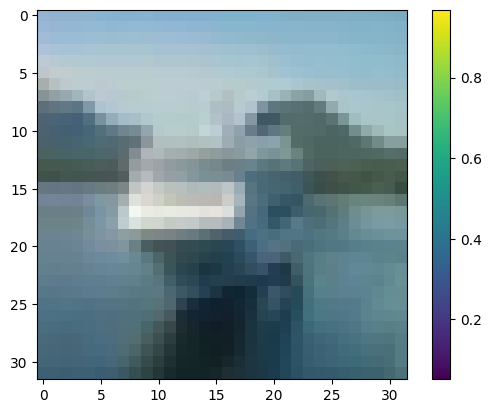

In [75]:
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

observation = get_number()

# Looks at the model's prediction and actual
print(f"Model's Raw Prediction: {predictions[observation]}")
print(f"Model's Prediction: {np.argmax(predictions[observation])}")
print(f"Actual Prediction: {np.argmax(test_labels[observation])}")

# Image of the observation
plt.figure()
plt.imshow(train_images[observation])
plt.colorbar()
plt.grid(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


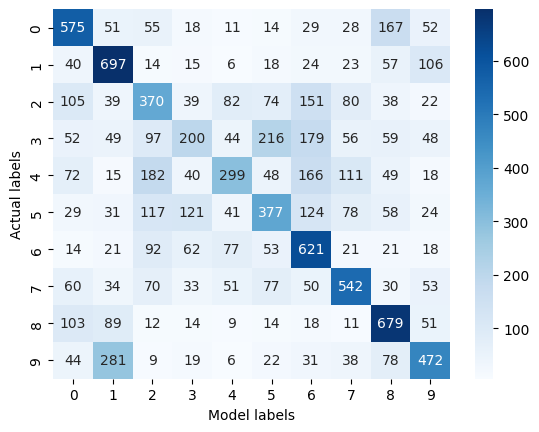

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels = np.argmax(model.predict(test_images), axis = 1)

cm = confusion_matrix(np.argmax(test_labels, axis = 1), pred_labels)

classes = np.arange(10)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Model labels')
plt.ylabel('Actual labels')
plt.show()